In [ ]:
# 0.Gathering the data
import requests
import pandas as pd

# Function to get the raw URL of the CSV file from GitHub
def get_raw_csv_url(repo_url, file_path):
    base_url = 'https://raw.githubusercontent.com'
    parts = repo_url.split('/')
    user = parts[-2]
    repo_name = parts[-1]
    raw_url = f'{base_url}/{user}/{repo_name}/main/{file_path}'
    return raw_url

# GitHub repository URL and relative CSV file path
repo_url = 'https://github.com/ArpitNavadiya/project'
file_path = 'dataset.csv'  # Assuming the CSV file is directly in the repository root or in a folder named 'data'

# Get the raw URL of the CSV file
csv_url = get_raw_csv_url(repo_url, file_path)

# Fetching the CSV data
response = requests.get(csv_url)
if response.status_code == 200:
    # Read the CSV data using pandas
    df = pd.read_csv(csv_url)
    # Process the data as needed
    print(df.head())  # Display the first few rows of the CSV data
else:
    print(f"Failed to fetch CSV file from {csv_url}. Status code: {response.status_code}")


   EyeClosureDuration BlinkRate HeadMovement SteeringWheelMovement TimeOfDay  \
0                 0.8        15           10                     5   Morning   
1                 0.9        14           11                     6   Morning   
2                 0.7        16            9                     4   Morning   
3                 1.2        12           13                     7   Morning   
4                 0.6        17            8                     3   Morning   

  DrowsinessLevel  
0           Alert  
1           Alert  
2           Alert  
3           Alert  
4           Alert  


In [ ]:
# 1. At least 5 techniques of the Data preprocessing
# 1.1 Handling missing values
import pandas as pd

# Assuming df is your DataFrame
df = pd.read_csv("PDSoepd1.csv")

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values per column:")
print(missing_values)


Missing values per column:
EyeClosureDuration        0
BlinkRate                12
HeadMovement              0
SteeringWheelMovement     3
TimeOfDay                 0
DrowsinessLevel           0
dtype: int64


In [ ]:
import numpy as np
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv("PDSoepd1.csv")

# Replace '?' with NaN for easier handling
df.replace('?', np.nan, inplace=True)

# Convert columns to numeric if needed
df = df.apply(pd.to_numeric, errors='ignore')

# Select numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns

# Impute missing values in numeric columns with mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# If there are non-numeric columns, fill missing values using forward filling (ffill)
non_numeric_cols = df.columns.difference(numeric_cols)
df[non_numeric_cols] = df[non_numeric_cols].fillna(method='ffill')

# Verify that missing values have been filled
print(df.isnull().sum())

# Save the updated DataFrame to a new CSV file
df.to_csv("updated_PDSoepd1.csv", index=False)


EyeClosureDuration       0
BlinkRate                0
HeadMovement             0
SteeringWheelMovement    0
TimeOfDay                0
DrowsinessLevel          0
dtype: int64


In [ ]:
# 1.2 Normalization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming df is your DataFrame
df = pd.read_csv("updated_PDSoepd1.csv")  # Replace "your_dataset.csv" with your actual dataset file name

# Min-Max scaling
df_min_max_scaled = df.copy()
df_min_max_scaled[['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']] = min_max_scaler.fit_transform(df[['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']])

# Standardization
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']] = standard_scaler.fit_transform(df[['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']])

# Save the scaled DataFrames to new CSV files
df_min_max_scaled.to_csv("min_max_scaled_data.csv", index=False)
df_standard_scaled.to_csv("standard_scaled_data.csv", index=False)


NameError: name 'min_max_scaler' is not defined

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Assuming df is your DataFrame
df = pd.read_csv("updated_PDSoepd1.csv")  # Replace "your_dataset.csv" with your actual dataset file name

# Min-Max scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = df.copy()
df_min_max_scaled[['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']] = min_max_scaler.fit_transform(df[['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']])

# Standardization
standard_scaler = StandardScaler()
df_standard_scaled = df.copy()
df_standard_scaled[['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']] = standard_scaler.fit_transform(df[['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']])

# Save the scaled DataFrames to new CSV files
df_min_max_scaled.to_csv("min_max_scaled_data.csv", index=False)
df_standard_scaled.to_csv("standard_scaled_data.csv", index=False)


In [ ]:
# 1.3 Encoding categorical variables
import pandas as pd

# Assuming df is your DataFrame with the required columns
df = pd.get_dummies(df, columns=['TimeOfDay', 'DrowsinessLevel'])

# Save the updated DataFrame to a new CSV file
df.to_csv('updated_data.csv', index=False)

In [ ]:
# 1.4 Outlier detection and removal
import pandas as pd
import numpy as np
from scipy import stats

# Assuming df is your DataFrame with the required columns
columns_to_check = ['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']

# Calculate Z-scores
z_scores = np.abs(stats.zscore(df[columns_to_check]))

# Remove rows with outliers (Z-score > 3)
df = df[(z_scores < 3).all(axis=1)]

# Save the updated DataFrame to a new CSV file
df.to_csv('outliers_removed.csv', index=False)


In [ ]:
# 1.5 Feature Scaling
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Assuming df is your DataFrame with the required columns
columns_to_scale = ['EyeClosureDuration', 'BlinkRate', 'HeadMovement', 'SteeringWheelMovement']

# Initialize Min-Max scaler
scaler = MinMaxScaler()

# Perform Min-Max scaling for selected columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

# Save the updated DataFrame to a new CSV file
df.to_csv('scaled_data.csv', index=False)


In [ ]:
# 2. Descriptive Statistical Analysis
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('updated_PDSoepd1.csv')

# Display descriptive statistics using describe()
description = df.describe()

# Display the descriptive statistics
print(description)


       EyeClosureDuration   BlinkRate  HeadMovement  SteeringWheelMovement
count          428.000000  428.000000    428.000000             428.000000
mean             1.175467   12.148780     12.544601               7.327830
std              0.371567    3.897373      3.599913               3.411453
min              0.500000    5.000000      7.000000               2.000000
25%              0.900000    8.750000      9.000000               4.000000
50%              1.200000   12.148780     12.000000               7.000000
75%              1.500000   15.000000     16.000000              10.000000
max              1.800000   18.000000     19.000000              13.000000


   EyeClosureDuration BlinkRate HeadMovement SteeringWheelMovement TimeOfDay  \
0                 0.8        15           10                     5   Morning   
1                 0.9        14           11                     6   Morning   
2                 0.7        16            9                     4   Morning   
3                 1.2        12           13                     7   Morning   
4                 0.6        17            8                     3   Morning   

  DrowsinessLevel  
0           Alert  
1           Alert  
2           Alert  
3           Alert  
4           Alert  

Missing values:
 EyeClosureDuration        0
BlinkRate                12
HeadMovement              0
SteeringWheelMovement     3
TimeOfDay                 0
DrowsinessLevel           0
dtype: int64


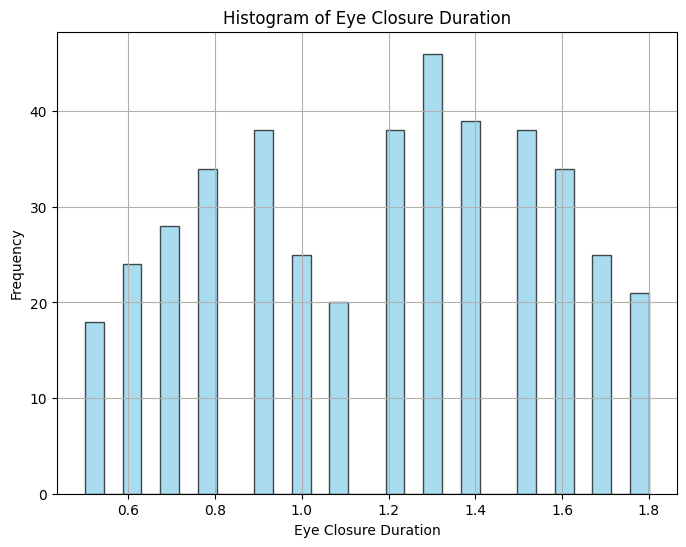

In [ ]:
# 3.  Visual Analysis
# 3.1 Using matplotlib
import pandas as pd

# Load the data from the CSV file into a DataFrame
file_path = 'PDSoepd1.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame to check if the data is loaded correctly
print(df.head())

# Check for missing values in the DataFrame
missing_values = df.isnull().sum()
print("\nMissing values:\n", missing_values)

# Drop rows with missing values if needed
# df.dropna(inplace=True)

# Perform data analysis, visualization, or any other tasks on this DataFrame
# For example, you can plot a histogram for the 'EyeClosureDuration' column
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(df['EyeClosureDuration'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Eye Closure Duration')
plt.xlabel('Eye Closure Duration')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


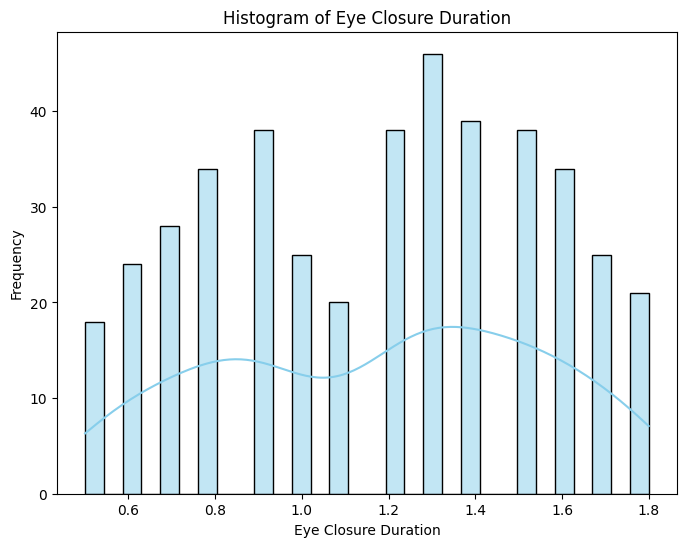

In [ ]:
# 3.2 Using sns
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('PDSoepd1.csv')

# Extract the column for plotting (assuming 'EyeClosureDuration' exists)
eye_closure_duration = df['EyeClosureDuration']

# Plotting histogram using Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(eye_closure_duration, kde=True, color='skyblue', bins=30)
plt.title('Histogram of Eye Closure Duration')
plt.xlabel('Eye Closure Duration')
plt.ylabel('Frequency')
plt.show()


In [ ]:
# 4. Feature Extraction based on correlation, covariance
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('updated_PDSoepd1.csv')

# Calculate the correlation matrix
corr_matrix = df.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Extract features based on correlation threshold
threshold = 0.5  # Adjust this threshold as needed
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

print("\nFeatures selected based on correlation:")
print(corr_features)

# Calculate the covariance matrix
cov_matrix = df.cov()

# Display the covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)

# Extract features based on covariance threshold
threshold_cov = 100  # Adjust this threshold as needed
cov_features = set()
for i in range(len(cov_matrix.columns)):
    for j in range(i):
        if abs(cov_matrix.iloc[i, j]) > threshold_cov:
            colname = cov_matrix.columns[i]
            cov_features.add(colname)

print("\nFeatures selected based on covariance:")
print(cov_features)


ValueError: could not convert string to float: 'Morning'

In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
df = pd.read_csv('updated_PDSoepd1.csv')

# Select only numeric columns
numeric_cols = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# Extract features based on correlation threshold
threshold = 0.5  # Adjust this threshold as needed
corr_features = set()
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > threshold:
            colname = corr_matrix.columns[i]
            corr_features.add(colname)

print("\nFeatures selected based on correlation:")
print(corr_features)

# Calculate the covariance matrix
cov_matrix = numeric_cols.cov()

# Display the covariance matrix
print("\nCovariance Matrix:")
print(cov_matrix)

# Extract features based on covariance threshold
threshold_cov = 100  # Adjust this threshold as needed
cov_features = set()
for i in range(len(cov_matrix.columns)):
    for j in range(i):
        if abs(cov_matrix.iloc[i, j]) > threshold_cov:
            colname = cov_matrix.columns[i]
            cov_features.add(colname)

print("\nFeatures selected based on covariance:")
print(cov_features)


Correlation Matrix:
                       EyeClosureDuration  BlinkRate  HeadMovement  \
EyeClosureDuration               1.000000  -0.865771      0.894275   
BlinkRate                       -0.865771   1.000000     -0.954658   
HeadMovement                     0.894275  -0.954658      1.000000   
SteeringWheelMovement            0.891947  -0.957583      0.993772   

                       SteeringWheelMovement  
EyeClosureDuration                  0.891947  
BlinkRate                          -0.957583  
HeadMovement                        0.993772  
SteeringWheelMovement               1.000000  

Features selected based on correlation:
{'BlinkRate', 'HeadMovement', 'SteeringWheelMovement'}

Covariance Matrix:
                       EyeClosureDuration  BlinkRate  HeadMovement  \
EyeClosureDuration               0.138062  -1.253753      1.196189   
BlinkRate                       -1.253753  15.189518    -13.394049   
HeadMovement                     1.196189 -13.394049     12.959374  

In [ ]:
# 5. Models Creation ( At Least two)
# 5.1 Random forest classification model



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import KBinsDiscretizer

# Load the dataset from csv
df = pd.read_csv('updated_PDSoepd1.csv')

# Extract features and target variable
X = df.iloc[:, 0].values.reshape(-1, 1)  # Reshape X to a 2D array
y = df.iloc[:, 1].values

# Binning the continuous target variable into categories
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # Adjust the number of bins as needed
y_binned = kbins.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees and random state set to 42
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train.ravel())  # Use ravel() to flatten y_train

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8604651162790697


Accuracy: 0.8604651162790697


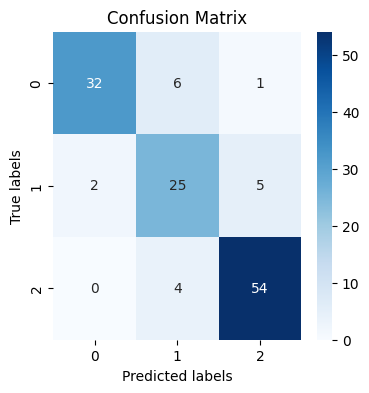

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(4, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt="g")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

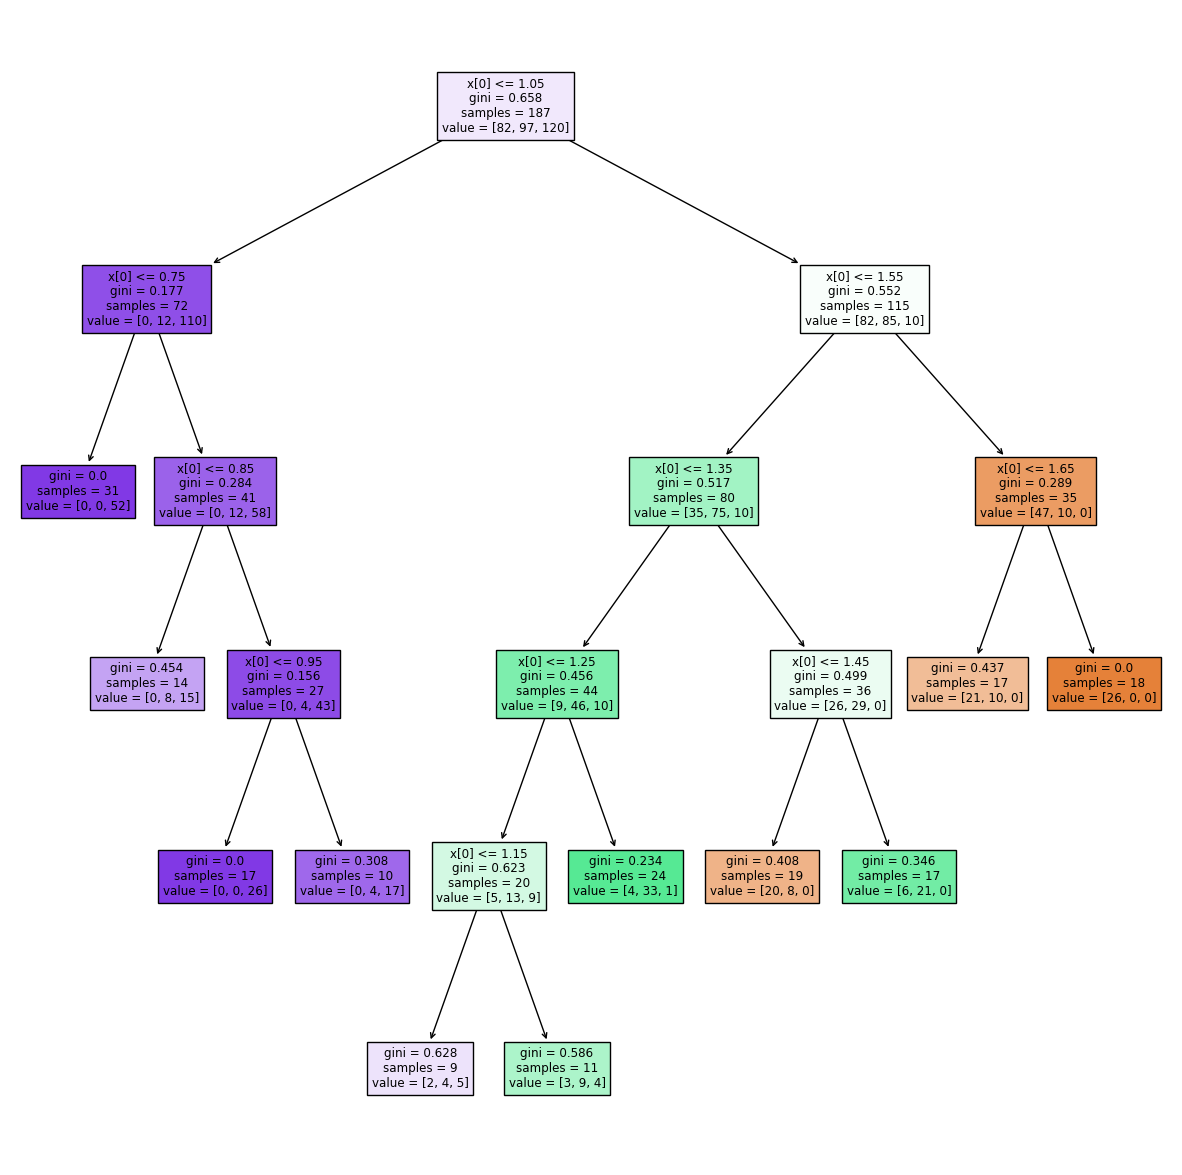

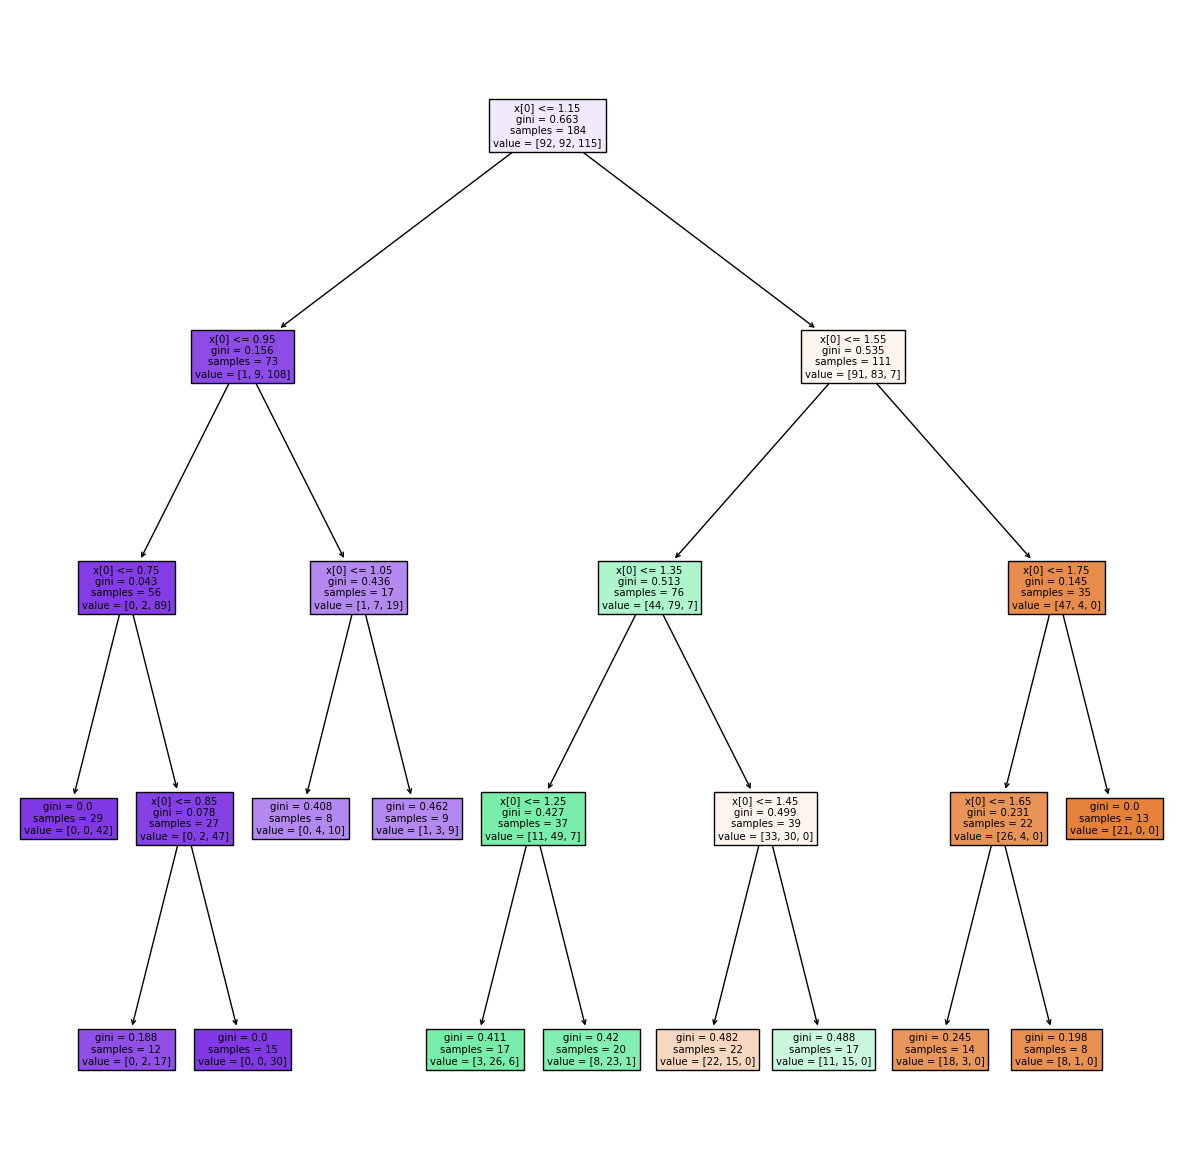

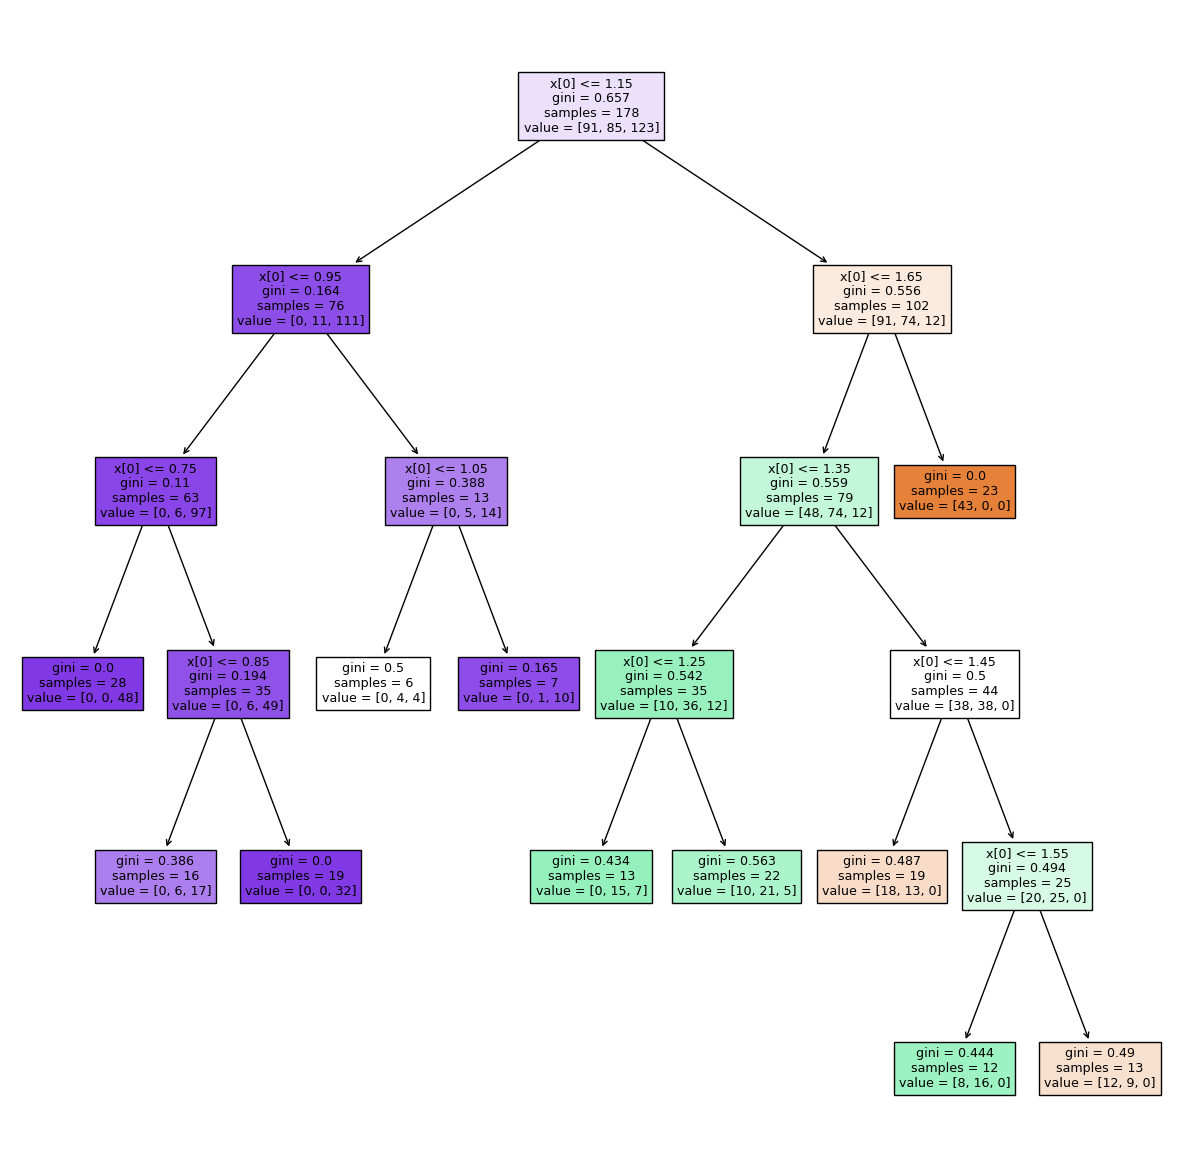

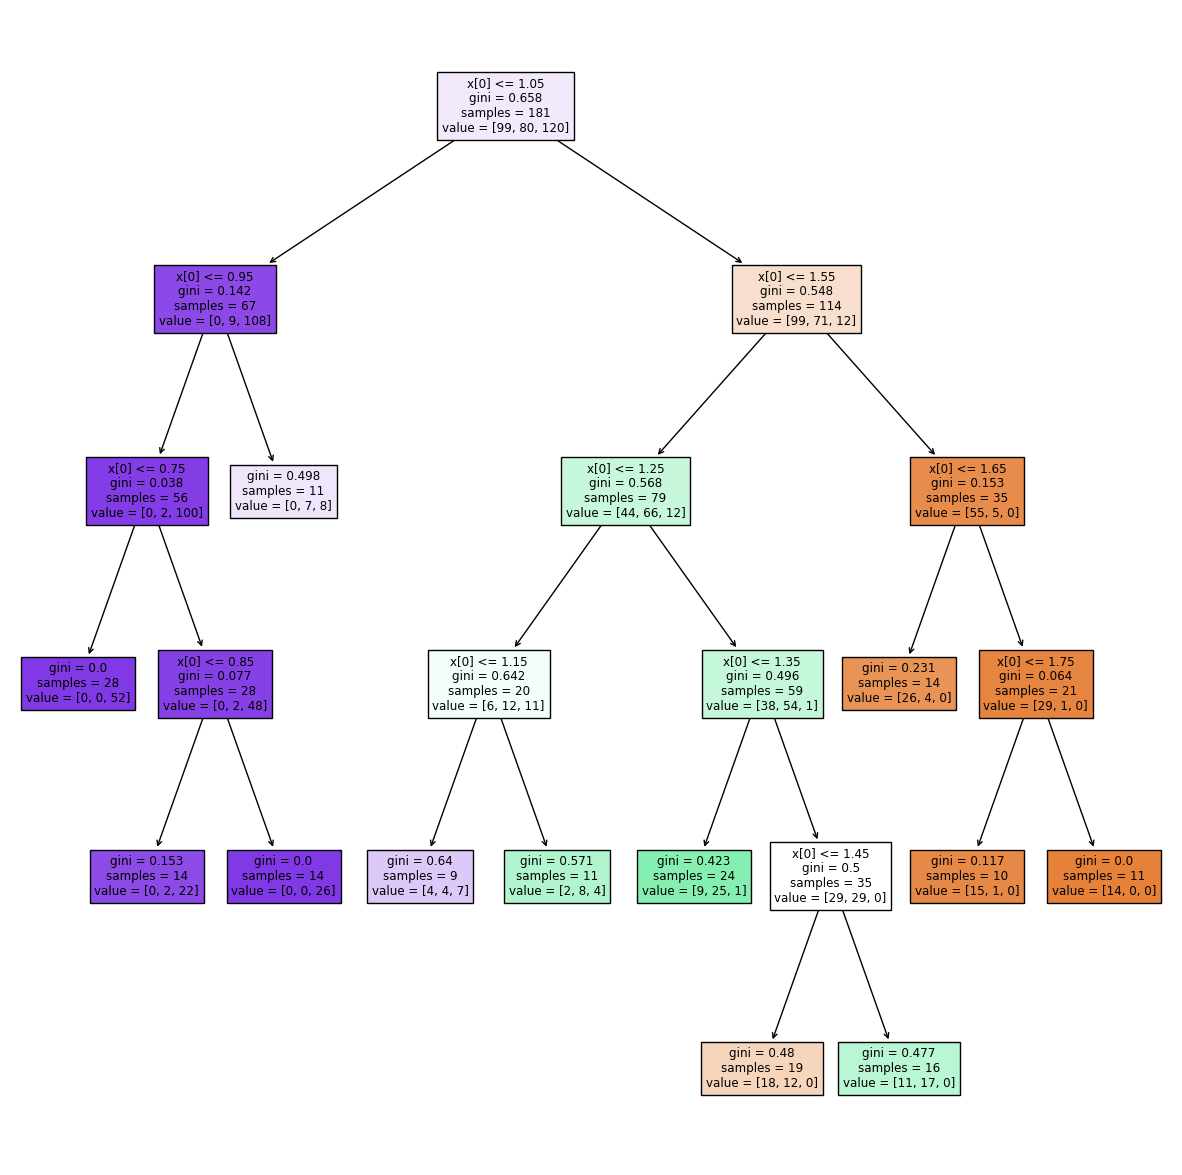

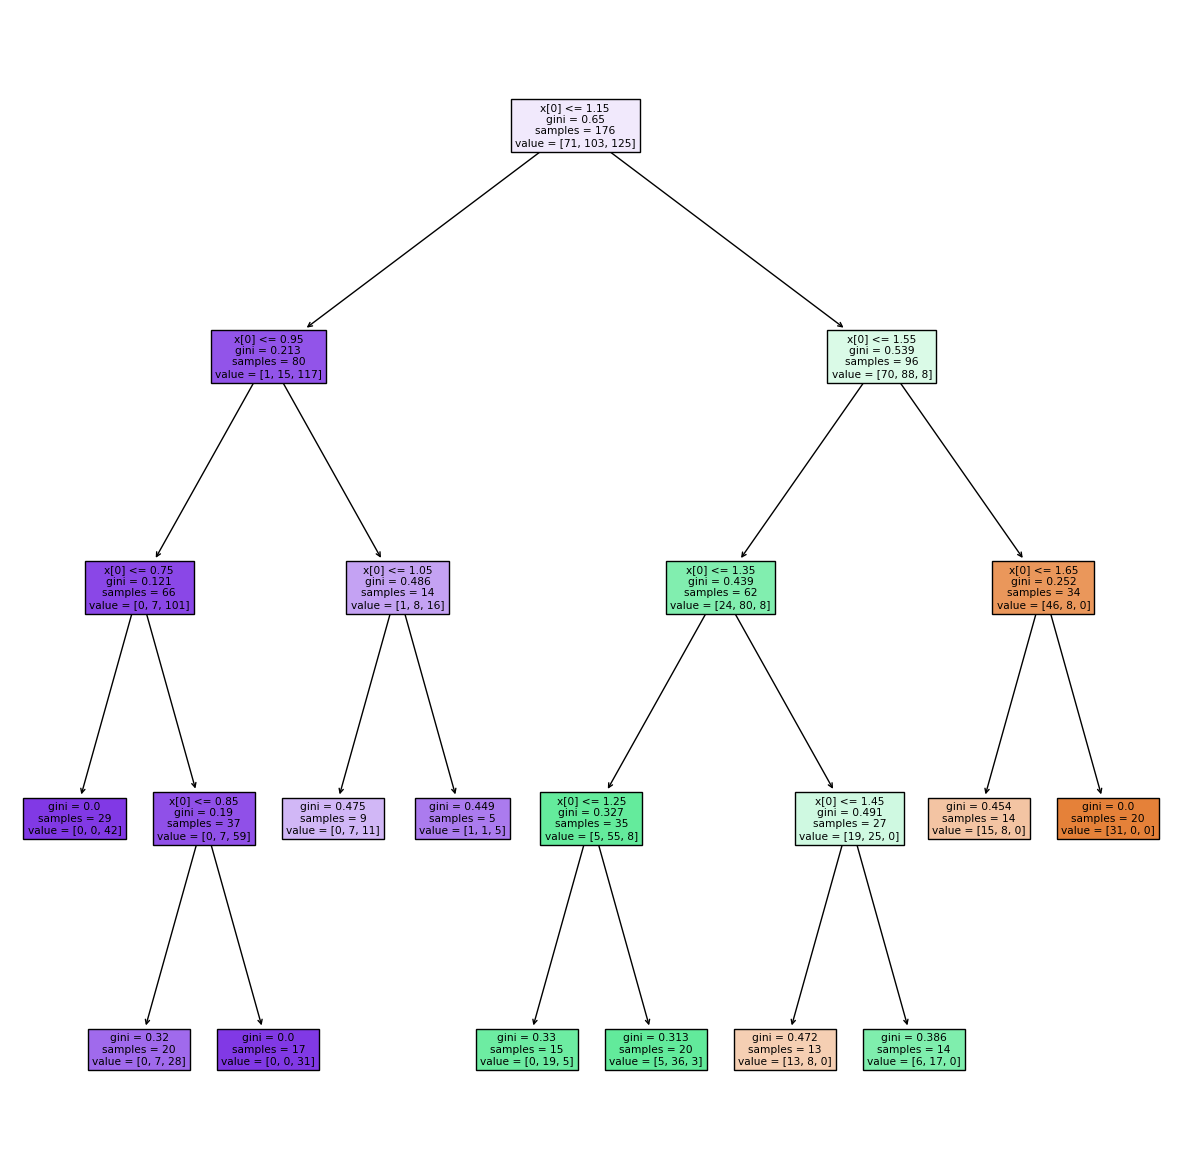

In [ ]:
from sklearn import tree
for i in range(5):
  # Select a tree from the Random Forest (e.g., the first tree)
  tree_to_visualize = rf_classifier.estimators_[i]

  # Plot the selected tree
  plt.figure(figsize=(15, 15))
  tree.plot_tree(tree_to_visualize, filled=True)
  plt.show()

In [ ]:
# 5.2 Decision tree classification model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Load the dataset from csv
df = pd.read_csv('updated_PDSoepd1.csv')

# Extract features and target variable
X = df.iloc[:, :-1]  # Features
y = df.iloc[:, -1]   # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Define categorical columns for one-hot encoding
categorical_cols = [col for col in X.columns if X[col].dtype == 'object']

# Apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), categorical_cols)], remainder='passthrough')
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Create a Decision Tree classifier with default parameters
dt_classifier = DecisionTreeClassifier(criterion='gini', random_state=0)

# Train the classifier
dt_classifier.fit(X_train_encoded, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test_encoded)

print(confusion_matrix(y_test, y_pred))

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


[[68  0]
 [ 0 61]]
Accuracy: 1.0


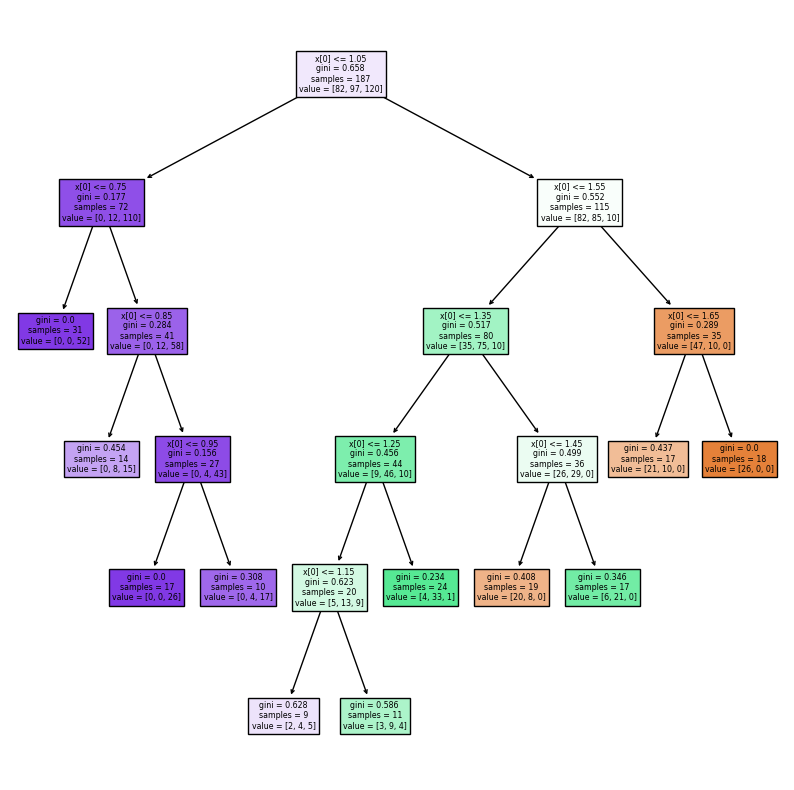

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plot the selected tree
plt.figure(figsize=(10, 10))
plot_tree(rf_classifier.estimators_[0], filled=True)  # Plotting the first tree of the RandomForestClassifier
plt.show()


In [ ]:
# # 6. Evaluation of the model based on various metrics
# 6.1 Random forest classification model
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Load the dataset from csv
df = pd.read_csv('updated_PDSoepd1.csv')

# Check the column names in your DataFrame
print(df.columns)

# Assuming 'y' is the correct column name for the target variable
target_column = 'y'

# Extract features and target variable
X = df.iloc[:, 0].values.reshape(-1, 1)  # Reshape X to a 2D array
y = df['DrowsinessLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier with 100 trees and random state set to 42
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate precision, recall, f1-score, and support
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Index(['EyeClosureDuration', 'BlinkRate', 'HeadMovement',
       'SteeringWheelMovement', 'TimeOfDay', 'DrowsinessLevel'],
      dtype='object')
Classification Report:
               precision    recall  f1-score   support

       Alert       0.88      0.92      0.90        71
      Drowsy       0.89      0.84      0.87        58

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129



In [ ]:
# 6.2 Decision tree classification model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer

# Load the dataset from csv
df = pd.read_csv('updated_PDSoepd1.csv')

# Extract features and target variable
X = df.iloc[:, 0].values.reshape(-1, 1)  # Reshape X to a 2D array
y = df.iloc[:, 1].values

# Binning the continuous target variable into categories
kbins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform')  # Adjust the number of bins as needed
y_binned = kbins.fit_transform(y.reshape(-1, 1))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_binned, test_size=0.3, random_state=42)

# Create and train the Decision Tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[32  6  1]
 [ 2 25  5]
 [ 0  4 54]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.94      0.82      0.88        39
         1.0       0.71      0.78      0.75        32
         2.0       0.90      0.93      0.92        58

    accuracy                           0.86       129
   macro avg       0.85      0.84      0.85       129
weighted avg       0.87      0.86      0.86       129



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Load the dataset from csv
df = pd.read_csv('updated_PDSoepd1.csv')

# Check the column names in your DataFrame
print(df.columns)

# Assuming 'y' is the correct column name for the target variable
target_column = 'y'

# Extract features and target variable
X = df.iloc[:, 0].values.reshape(-1, 1)  # Reshape X to a 2D array
y = df['DrowsinessLevel']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Train the classifier
dt_classifier.fit(X_train, y_train)

# Make predictions
y_pred = dt_classifier.predict(X_test)

# Calculate precision, recall, f1-score, and support
report = classification_report(y_test, y_pred)
print("Classification Report for Decision Tree:\n", report)


Index(['EyeClosureDuration', 'BlinkRate', 'HeadMovement',
       'SteeringWheelMovement', 'TimeOfDay', 'DrowsinessLevel'],
      dtype='object')
Classification Report for Decision Tree:
               precision    recall  f1-score   support

       Alert       0.88      0.92      0.90        71
      Drowsy       0.89      0.84      0.87        58

    accuracy                           0.88       129
   macro avg       0.88      0.88      0.88       129
weighted avg       0.88      0.88      0.88       129

